#### Feature Engineering Tree

##### Feature Transformation

#### Feature Scaling

##### Standardization

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\Social_Network_Ads.csv")
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
214,15622478,Male,47,43000,0
365,15807525,Female,59,29000,1
119,15701962,Male,41,59000,0
19,15621083,Female,48,29000,1
88,15768816,Male,26,81000,0


In [15]:
df = df.iloc[:,2:]

In [17]:
df.sample(5)

,Age,EstimatedSalary,Purchased
233,49,86000,1
21,47,49000,1
30,31,74000,0
353,37,57000,0
125,39,61000,0


In [19]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),df['Purchased'],test_size=0.3,random_state = 0)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(280, 2) (120, 2) (280,) (120,)


In [25]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaletr to the train set,it will learn the parameters
scaler.fit(X_train)

# transform the train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [31]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [35]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.86,69807.14
std,10.22,34641.20
min,18.00,15000.00
25%,30.00,43000.00
50%,37.00,70500.00
75%,46.00,88000.00
max,60.00,150000.00


In [39]:
np.round(X_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


In [41]:
import matplotlib.pyplot as plt

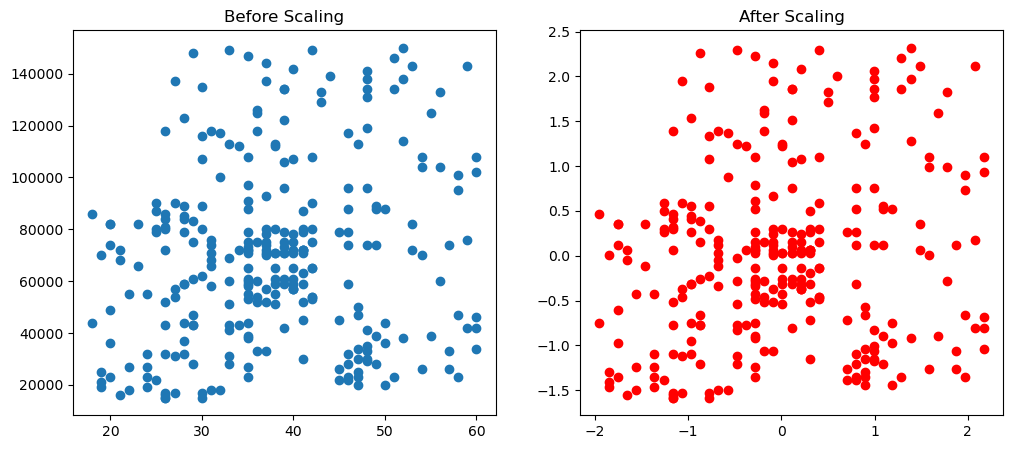

In [43]:
# Effect of scaling (Distribution of Data)
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After Scaling")
plt.show()

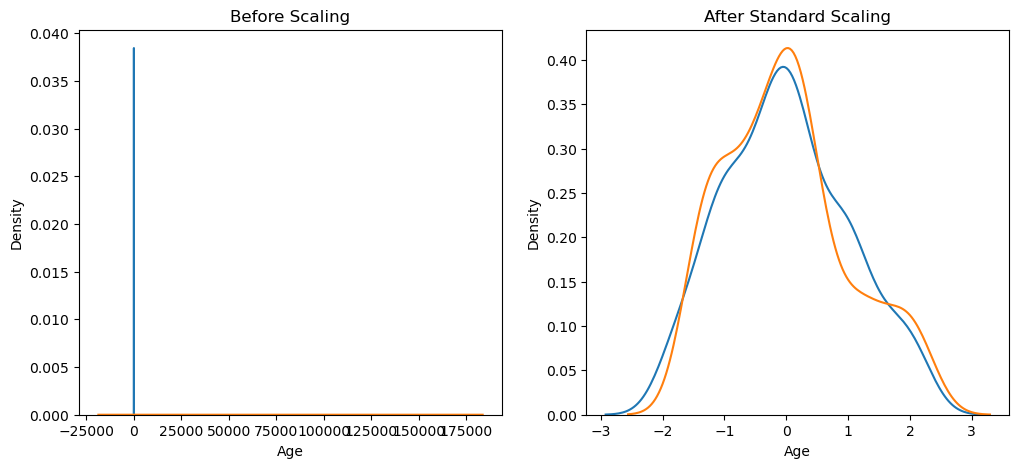

In [47]:
# To check the benefit of scaling
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax = ax1)

# After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax = ax2)
plt.show()

# Both the Distribution of data(Age,Estimated Salary) are comparable

#### Comaprison of Distributions

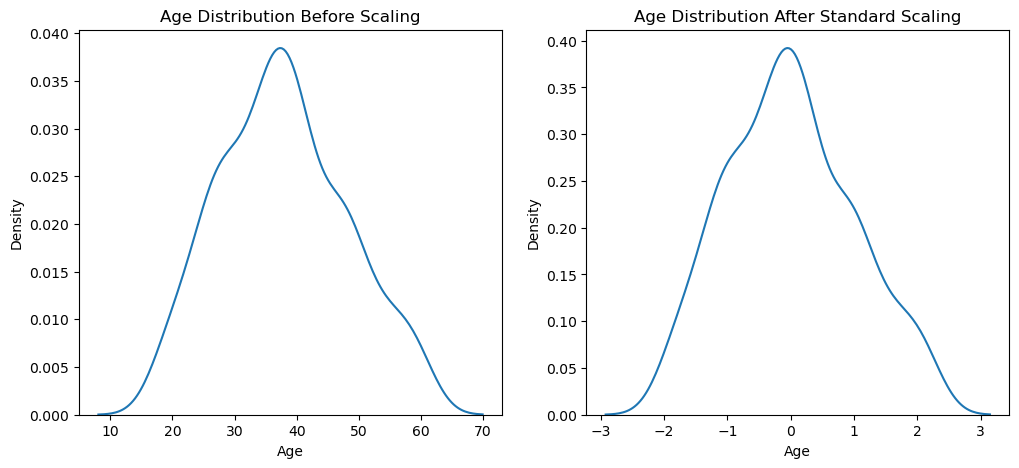

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

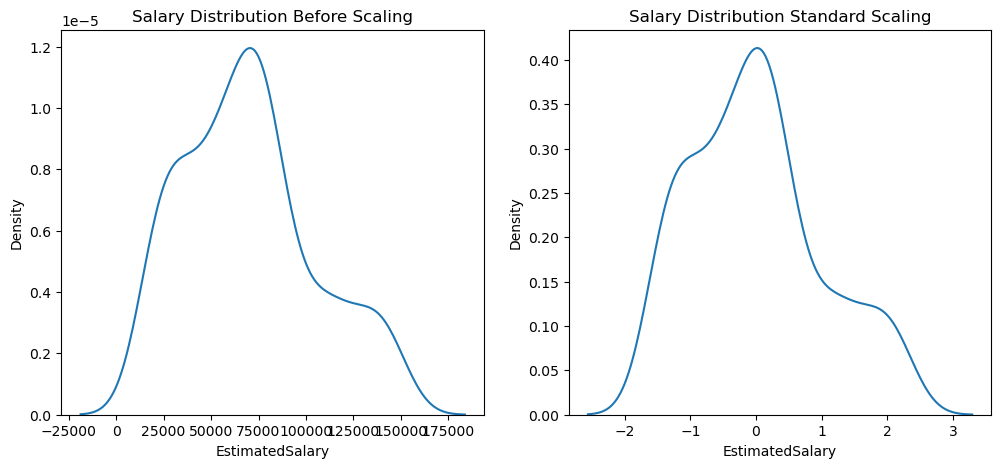

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#### Why Scaling is important

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [81]:
knn.fit(X_train,y_train)
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [85]:
from sklearn.metrics import accuracy_score
print("Actual : ",accuracy_score(y_test,y_pred))
print("Scaled : ",accuracy_score(y_test,y_pred_scaled))

Actual :  0.825
Scaled :  0.9166666666666666


In [71]:
# Scaling is not Impactible on each and every algorithm.
# Scaling doesn't have an impact on Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [75]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [77]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


#### Impact of Outliers on Standard Scaler

In [93]:
df1 = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purcahsed':[0,1,1]})
df = pd.concat([df,df1],ignore_index=True)

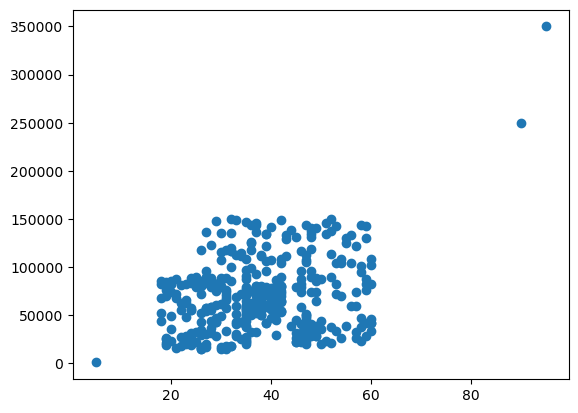

In [95]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 3), (121, 3))

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

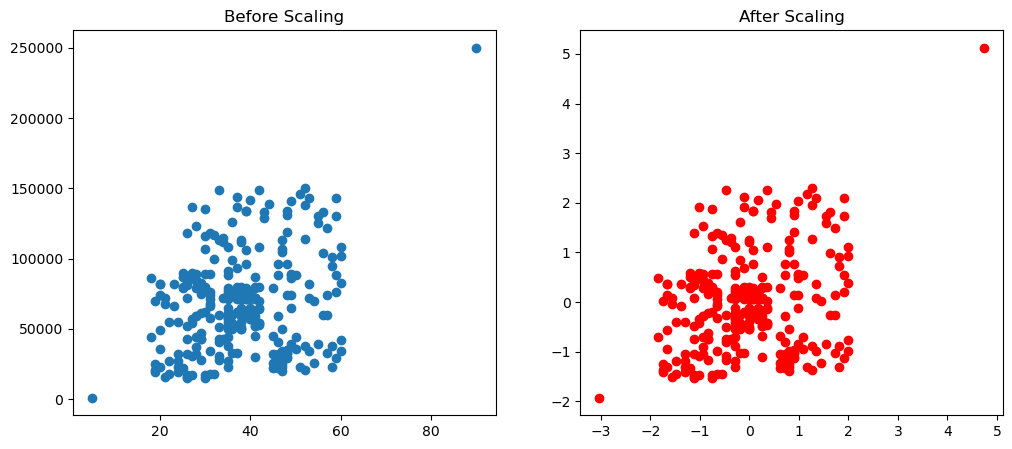

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

#### Normalization

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df_wine = pd.read_csv(r'D:\krish naik - udemy ML and Deep Learning\CampusX\Feature Engineering\wine_data.csv',header=None,
                      usecols=[0,1,2])
df_wine.columns = ['Class Label','Alcohol','Malic Acid']
# Output Column - Class Label
# Input Columns - Alcohol,Malic Acid

In [132]:
df_wine.sample(5)

,Class Label,Alcohol,Malic Acid
41,1,13.41,3.84
80,2,12.00,0.92
81,2,12.72,1.81
6,1,14.39,1.87
150,3,13.50,3.12


<Axes: xlabel='Alcohol', ylabel='Density'>

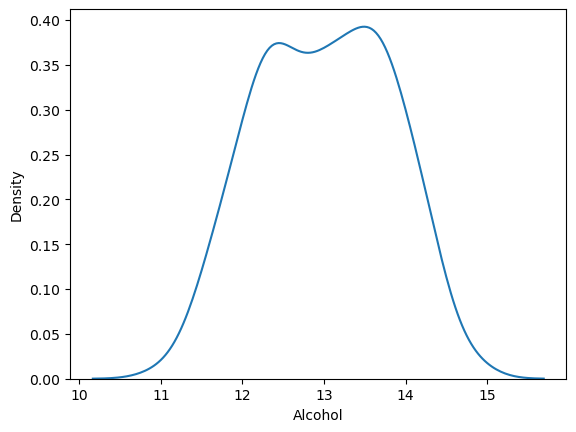

In [134]:
sns.kdeplot(df_wine['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

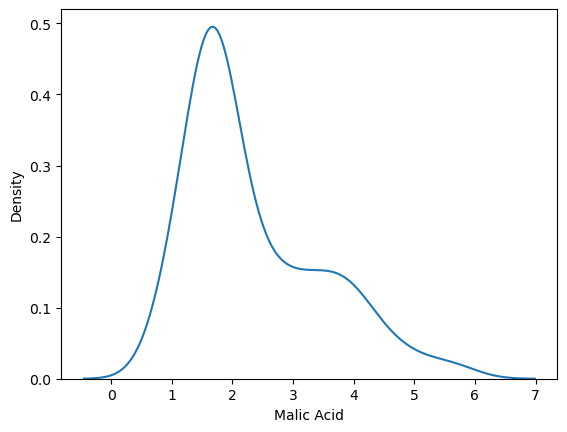

In [136]:
sns.kdeplot(df_wine['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

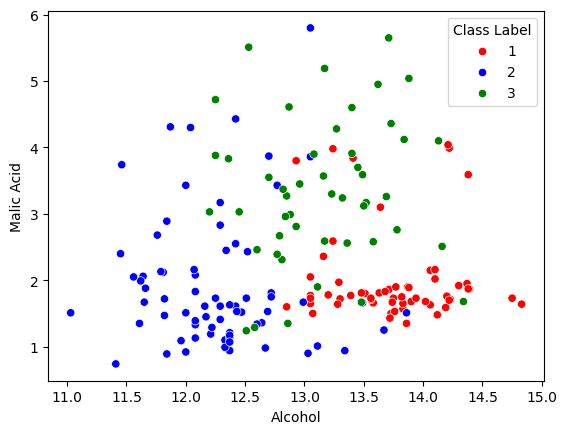

In [144]:
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(data = df_wine,x ='Alcohol',y ='Malic Acid',hue = 'Class Label',palette=color_dict)

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_wine.drop('Class Label',axis = 1),df_wine['Class Label'],test_size=0.3,
                                                 random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(124, 2) (54, 2) (124,) (54,)


In [154]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

# fit the minmax to the train set,it will learn the parameters
minmax.fit(X_train) # min value and max value

# transform train and test sets
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [156]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [162]:
np.round(X_train.describe(),2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [164]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic Acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


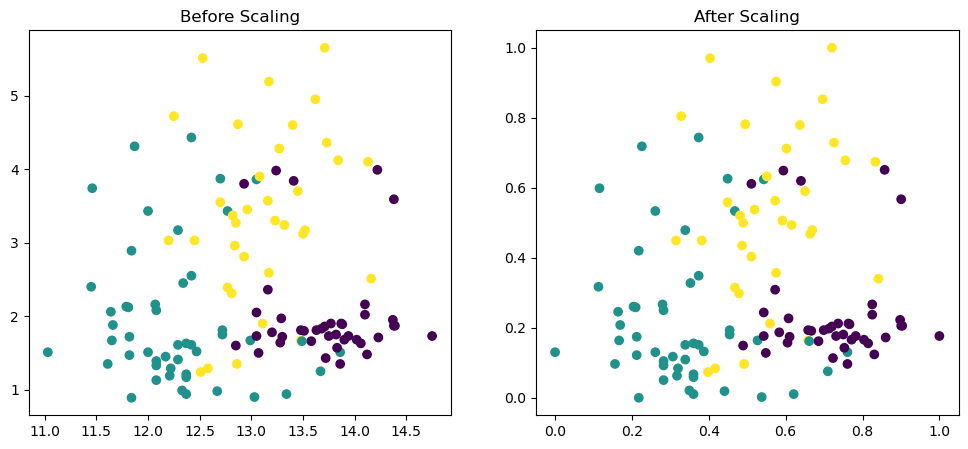

In [170]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))
# Before scaling, Distribution
ax1.scatter(X_train['Alcohol'],X_train['Malic Acid'],c = y_train)
ax1.set_title("Before Scaling")
# After Scaling, Distribution
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic Acid'],c = y_train)
ax2.set_title("After Scaling")
plt.show()

# While retaining the original Data, We are Squashing/compress the data in a unit Rectangle in 2D angle 

# Impact of Outliers exists while performing MinMax Scaling as we are just squashing the data

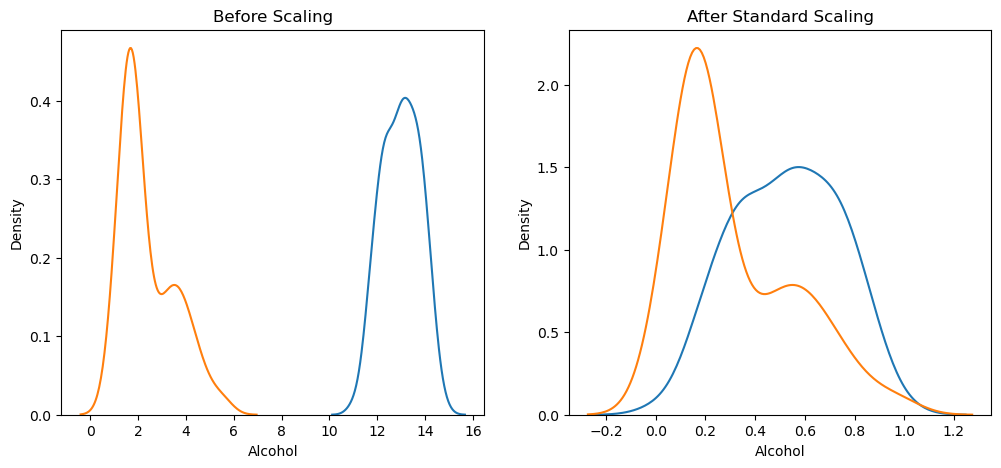

In [174]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax = ax1)

# After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax = ax2)
plt.show()

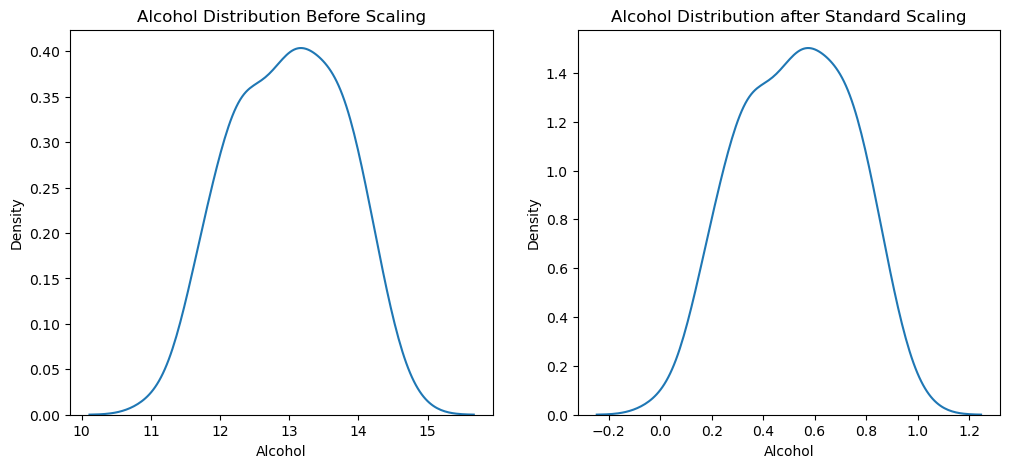

In [178]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

# Before Scaling
ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

# After Scaling
ax2.set_title("Alcohol Distribution after Standard Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

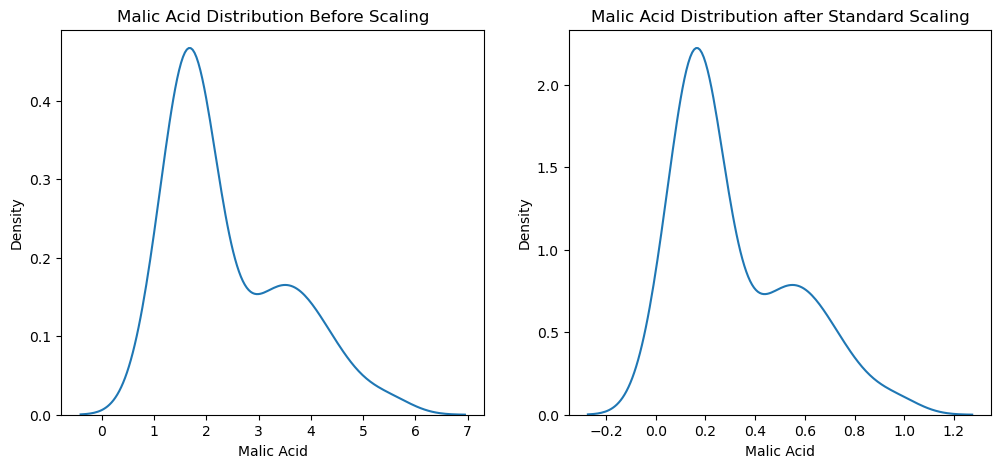

In [180]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,5))

# Before Scaling
ax1.set_title("Malic Acid Distribution Before Scaling")
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

# After Scaling
ax2.set_title("Malic Acid Distribution after Standard Scaling")
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)
plt.show()

# Subjective - Changes in the Distribution after performing Min Max scaling